In [100]:
################### TO DO's ########################

# - Erklärungen hinzufügen: Was wurde warum gemacht
# - Abfrageergebnisse interpretieren: 
#     Welche Ergebnisse sind zu sehen? Können Schlüsse gezogen / Hypothesen erstellt werden?
# - Habe jetzt 3 versch. Plot-Varianten eingebaut (plt, sns, plotly). 
#     Bitte um Feedback, welche Variante ihr bevorzugt und um Anpassung der Plots entsprechend,
#     damit im Notebook eine konsistente Darstellung ist.  
# - Bitte alle Blöcke durchlaufen lassen, auf Fehler kontrollieren und ggf. korrigieren. 

# Basic Analyses

In order to obtain a basic overview of the data, simple queries are made in a basic analysis, which may provide information about the data package.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
from collections import Counter
from collections import defaultdict

In [4]:
df = pd.read_csv('p1p857.csv', index_col=0)
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revbytes,revperc
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,2848,4.353933
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,2848,1.228933
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,2848,1.193820
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,2848,1.264045
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,2848,2.001404


# Queries on a per article basis

### How many revisions were made?

This query counts the number of unique revision IDs per article and also gives the average size of the revisions in bytes per article.

In [5]:
revcount = df.groupby(['page_title']).agg({'revision_id' : 'count', 'bytes' : 'mean'})
revcount = revcount.rename({'revision_id' : 'revcount', 'bytes' : 'meansize'}, axis = "columns").reset_index()
revcount = revcount.sort_values(['revcount'], ascending=False)
revcount.head()

,page_title,revcount,meansize
146,Anarchism,19961,84662.829167
27,Abraham Lincoln,17613,108672.676375
96,Albert Einstein,17476,86462.335031
84,Albania,16271,94737.645873
133,American Revolutionary War,15881,134133.046597


Text(0.5, 1.0, 'Top 5 of most revisioned Articles')

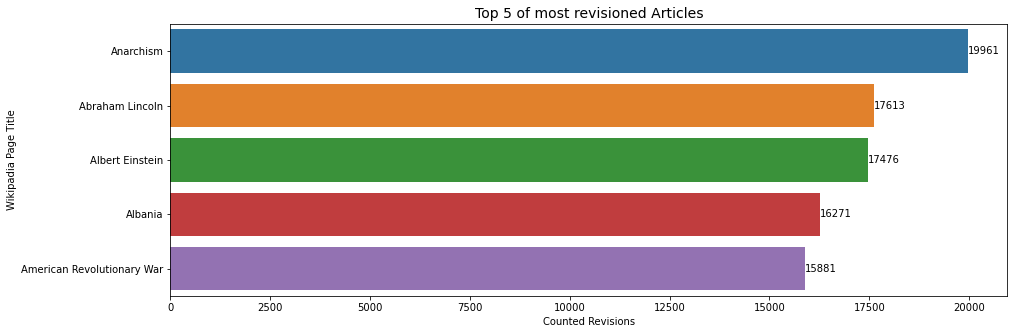

In [6]:
plt.figure(figsize=(15,5))
plot1 = sns.barplot(x = 'revcount', y = 'page_title', data = revcount[:5])
plt.xlabel("Counted Revisions")
plt.ylabel("Wikipadia Page Title")
plt.bar_label(plot1.containers[0])
plt.title("Top 5 of most revisioned Articles", size=14)

**How many revisions were made per date?**

The query groups the output by title and date and shows how many revidents contributed that day with an average of how many bytes.

In [7]:
revdate = df.groupby(['page_title', 'dates']).agg({'revision_id' : 'count', 'bytes' : 'mean'})
revdate = revdate.rename({'revision_id' : 'revcount', 'bytes' : 'meansize'}, axis = "columns")
revdate.sort_values(['page_title', 'dates'], ascending = True)

revcount  meansize
page_title                                     dates                         
A                                              2001-05-17         1    6784.0
                                               2001-06-26         1     871.0
                                               2001-07-05         2    7374.0
                                               2002-02-02         1    7528.0
                                               2002-02-25         1    7565.0
...                                                             ...       ...
Wikipedia:Adding Wikipedia articles to Nupedia 2002-12-20         2    6464.0
                                               2003-01-10         1    6667.0
                                               2003-02-07         1    6596.0
                                               2003-03-12         1    6690.0
                                               2003-03-17         1      45.0

[179720 rows x 2 columns]

In [8]:
dfrevdate = revdate.reset_index().sort_values(['dates'], ascending = True)
dfrevdate.head()

,page_title,dates,revcount,meansize
29626,AfghanistanCommunications,2001-01-21,1,1159.0
29662,AfghanistanTransportations,2001-01-21,1,927.0
29657,AfghanistanTransnationalIssues,2001-01-21,1,523.0
29649,AfghanistanPeople,2001-01-21,1,1601.0
29643,AfghanistanMilitary,2001-01-21,1,718.0


In [9]:
#dfrevdate = dfrevdate[3000:3100].reset_index()
dfrevdate.tail()

,page_title,dates,revcount,meansize
5549,ASCII,2022-02-01,2,107814.5
110815,Angola,2022-02-01,2,152110.5
135804,Arabic,2022-02-01,5,190814.2
170495,Ayn Rand,2022-02-01,2,92076.0
35101,Aikido,2022-02-01,1,56891.0


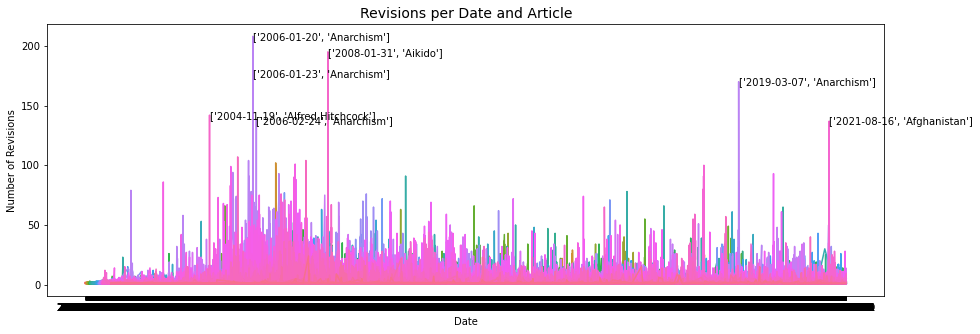

In [10]:
plt.figure(figsize=(15,5))
plot2 = sns.lineplot(x = 'dates', y = 'revcount', data = dfrevdate, hue = 'page_title', legend = None)
plt.xlabel("Date")
plt.ylabel("Number of Revisions")
plt.title("Revisions per Date and Article", size=14)
for x, y, z in zip(dfrevdate['dates'], dfrevdate['revcount'], dfrevdate['page_title']):
    if y > 130:
        plt.text(x = x, y = y-3, s = [x, z])
plt.show()

**Revisions per date cumulated**

Step 1: generate new column "revdates": indicates the number of revisions for this item on this day.

In [11]:
df['revdates'] = df.groupby(by='dates')['dates'].transform('count')
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revbytes,revperc,revdates
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,2848,4.353933,7
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,2848,1.228933,269
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,2848,1.193820,8
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,2848,1.264045,161
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,2848,2.001404,300


Step 2: Query generates the cumulative total of daily revision counts based on the article and date

In [12]:
revcums = df.groupby(['page_title', 'dates']).sum().groupby(level=0).cumsum().reset_index()
revcums.head()

,page_title,dates,page_id,revision_id,bytes,revbytes,revperc,revdates
0,A,2001-05-17,290,263232,6784,47173800,0.014381,2
1,A,2001-06-26,580,466368321,7655,94347600,0.016227,3
2,A,2001-07-05,1160,932706906,22403,188695200,0.047490,7
3,A,2002-02-02,1450,932710363,29931,235869000,0.063448,11
4,A,2002-02-25,1740,932795893,37496,283042800,0.079485,280


In [13]:
filter = ((revcums['page_title'].str.contains('anarchism', case = False)))
dfanarchism = revcums[filter]
dfanarchism.head()

,page_title,dates,page_id,revision_id,bytes,revbytes,revperc,revdates
96584,Anarchism,2001-10-11,12,233194,8884,1689954733,0.000526,3
96585,Anarchism,2001-11-28,24,466389,17888,3379909466,0.001058,4
96586,Anarchism,2001-12-02,48,333118947,36490,6759818932,0.002159,20
96587,Anarchism,2002-02-25,72,333156894,57315,10139728398,0.003392,558
96588,Anarchism,2002-02-27,96,333197157,80195,13519637864,0.004745,566


Text(0.5, 1.0, 'Cum. Revisions per Date for Anarchism')

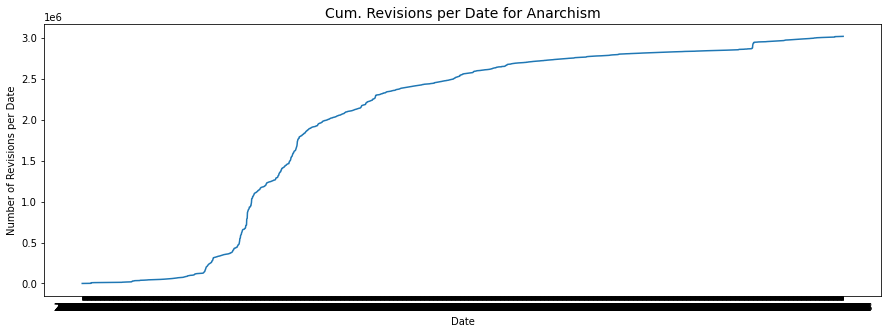

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(x = 'dates', y = 'revdates', data = dfanarchism, legend = None)
plt.xlabel("Date")
plt.ylabel("Number of Revisions per Date")
plt.title("Cum. Revisions per Date for Anarchism", size=14)

**How many revisions were handled by each revisor?**

Query groups by article, username, and date, counts revisions on that day, and outputs the average revision size.

In [15]:
revuser = df.groupby(['page_title', 'contributor_name', 'contributor_id', 'dates']).agg({'revdates' : 'count', 'bytes' : 'mean'})
revuser.sort_values(['page_title', 'revdates'], ascending = False)

revdates  \
page_title                                     contributor_name  contributor_id dates                  
Wikipedia:Adding Wikipedia articles to Nupedia anon              211.26.134.83  2002-12-20         2   
                                               Conversion script 1226483        2002-02-25         1   
                                               David Martland    5457           2002-11-18         1   
                                               Eclecticology     372            2002-05-19         1   
                                               Larry_Sanger      0              2001-03-28         1   
...                                                                                              ...   
A                                              Žiedas            8859014        2010-01-05         1   
                                               Саша Стефановић   205156         2005-11-22         1   
                                               Учхљёная          30241636       2018-02-19         1   
                                                                                2018-03-13         1   
                                               とある白い猫            184109         2005-11-04         1   

                                                                                              bytes  
page_title                                     contributor_name  contributor_id dates                
Wikipedia:Adding Wikipedia articles to Nupedia anon              211.26.134.83  2002-12-20   6464.0  
                                               Conversion script 1226483        2002-02-25   5059.0  
                                               David Martland    5457           2002-11-18   6457.0  
                                               Eclecticology     372            2002-05-19   5006.0  
                                               Larry_Sanger      0              2001-03-28   4637.0  
...                                                                                             ...  
A                                              Žiedas            8859014        2010-01-05   8649.0  
                                               Саша Стефановић   205156         2005-11-22   9942.0  
                                               Учхљёная          30241636       2018-02-19  22639.0  
                                                                                2018-03-13  21315.0  
                                               とある白い猫            184109         2005-11-04   9939.0  

[369149 rows x 2 columns]

In [16]:
dfrevuser = revuser.reset_index().sort_values(['bytes'], ascending = False)
dfrevuser.head()

,page_title,contributor_name,contributor_id,dates,revdates,bytes
110839,Albert Einstein,anon,24.130.51.210,2005-09-22,1,823404.000000
104931,Albert Einstein,Jayjg,76027,2005-09-22,1,823404.000000
80801,Alabama,anon,207.165.193.214,2006-09-26,2,804901.000000
280464,Arabic,Paines,3034273,2006-12-15,1,802181.000000
282571,Arabic,anon,209.232.116.104,2007-10-09,3,793164.666667


Text(0.5, 1.0, 'Top 5 of biggest Revisions per Contributor')

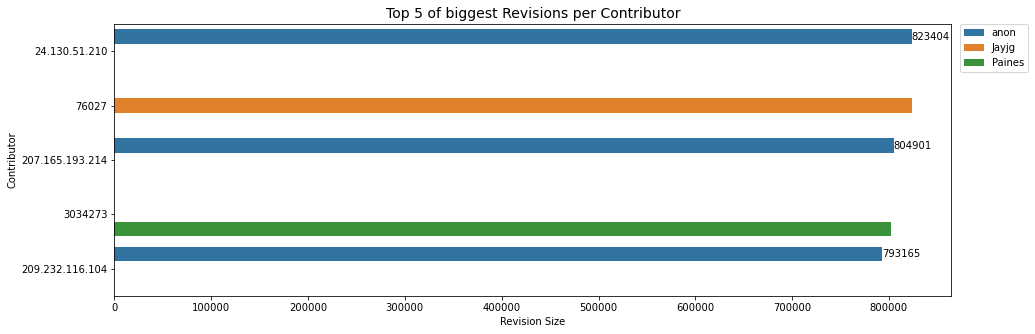

In [17]:
plt.figure(figsize=(15,5))
data = dfrevuser[:5]
revuserplot = sns.barplot(x = 'bytes', y = 'contributor_id', hue = 'contributor_name', data = data)
plt.xlabel("Revision Size")
plt.ylabel("Contributor")
plt.bar_label(revuserplot.containers[0])
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.title("Top 5 of biggest Revisions per Contributor", size=14)

**Which users change the most in their revisions (compared to the average)?**

Query of changed bytes per article per user and comparison by output of the sum of all revision bytes of the article.

In [18]:
revuserbytes = df.groupby(['page_title', 'contributor_name', 'bytes']).agg({'revdates' : 'count', 'revbytes' : 'sum'})
revuserbytes.sort_values(['page_title', 'bytes'], ascending = False).reset_index().head()

,page_title,contributor_name,bytes,revdates,revbytes
0,Wikipedia:Adding Wikipedia articles to Nupedia,Stephen Gilbert,6690,1,54085
1,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,6667,1,54085
2,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,6596,1,54085
3,Wikipedia:Adding Wikipedia articles to Nupedia,anon,6471,1,54085
4,Wikipedia:Adding Wikipedia articles to Nupedia,David Martland,6457,1,54085


**How large are the revisions in relation?**

Query sorted by article, revisor and percentage of revisions

In [39]:
revsize = df.groupby(['page_title', 'contributor_name', 'revperc']).agg({'revdates' : 'count', 'revbytes' : 'sum'})
revsize = revsize.sort_values(['page_title', 'revperc', 'contributor_name'], ascending = False).reset_index()
revsize.head()

,page_title,contributor_name,revperc,revdates,revbytes
0,Wikipedia:Adding Wikipedia articles to Nupedia,Stephen Gilbert,12.369419,1,54085
1,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,12.326893,1,54085
2,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,12.195618,1,54085
3,Wikipedia:Adding Wikipedia articles to Nupedia,anon,11.964500,1,54085
4,Wikipedia:Adding Wikipedia articles to Nupedia,anon,11.938615,1,54085


In [54]:
filter = (revsize['page_title'].str.contains('Anarchism'))
anarchrevsize = revsize[filter].sort_values('revperc', ascending=False)
anarchrevsize

,page_title,contributor_name,revperc,revdates,revbytes
202469,Anarchism,Eduen,1.823126e-02,2,3379909466
202470,Anarchism,Citation bot,1.220512e-02,1,1689954733
202471,Anarchism,WisdomTooth3,1.220133e-02,1,1689954733
202472,Anarchism,SpeedRunnerOfPersia,1.195233e-02,1,1689954733
202473,Anarchism,SpeedRunnerOfPersia,1.195068e-02,1,1689954733
...,...,...,...,...,...
220436,Anarchism,anon,2.366927e-07,1,1689954733
220437,Anarchism,anon,5.917318e-08,1,1689954733
220438,Anarchism,anon,0.000000e+00,6,10139728398
220439,Anarchism,McNick,0.000000e+00,1,1689954733


In [55]:
filter = (anarchrevsize['revperc'] > 0.011)
anarchrevsize1 = anarchrevsize[filter]
anarchrevsize1.head()

,page_title,contributor_name,revperc,revdates,revbytes
202469,Anarchism,Eduen,0.018231,2,3379909466
202470,Anarchism,Citation bot,0.012205,1,1689954733
202471,Anarchism,WisdomTooth3,0.012201,1,1689954733
202472,Anarchism,SpeedRunnerOfPersia,0.011952,1,1689954733
202473,Anarchism,SpeedRunnerOfPersia,0.011951,1,1689954733


In [56]:
data = go.Bar(x=anarchrevsize1.contributor_name, y=anarchrevsize1.revperc, text=anarchrevsize1.page_title)
fig = go.Figure(data=data, layout_title_text="Contributors for article Anarchism")
fig.show()

**What are the maximum values for revisions?**

Query by date and sort by article and sort by revision size in descending order

In [59]:
revspikes = df.groupby(['page_title', 'dates']).agg({'bytes' : 'max'})
revspikes = revspikes.sort_values(['page_title', 'bytes', 'dates'], ascending = False).reset_index()
revspikes.head()

,page_title,dates,bytes
0,Wikipedia:Adding Wikipedia articles to Nupedia,2003-03-12,6690
1,Wikipedia:Adding Wikipedia articles to Nupedia,2003-01-10,6667
2,Wikipedia:Adding Wikipedia articles to Nupedia,2003-02-07,6596
3,Wikipedia:Adding Wikipedia articles to Nupedia,2002-12-20,6471
4,Wikipedia:Adding Wikipedia articles to Nupedia,2002-11-18,6457


In [60]:
filter = (revspikes['page_title'].str.contains('Anarchism'))
anarchrevspikes = revspikes[filter].sort_values('bytes', ascending=False)
anarchrevspikes

,page_title,dates,bytes
79920,Anarchism,2012-11-16,308100
79921,Anarchism,2018-12-31,206261
79922,Anarchism,2019-01-06,201989
79923,Anarchism,2019-03-06,200208
79924,Anarchism,2018-12-30,199632
...,...,...,...
83131,Anarchism,2003-05-05,4493
83132,Anarchism,2003-05-04,4489
83133,Anarchism,2003-05-06,4487
83134,Anarchism,2003-05-03,4481


In [63]:
data = go.Bar(x=anarchrevspikes.dates, y=anarchrevspikes.bytes, text=anarchrevspikes.page_title)
fig = go.Figure(data=data, layout_title_text="largest Revisions for article Anarchism in bytes")
fig.show()

**Do users who revise more often also make larger revisions?**

Step 1: Generate the column "nrevs" which counts the number of revisions per user

In [65]:
df['nrevs'] = df.groupby(by='contributor_id')['contributor_id'].transform('count')
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revbytes,revperc,revdates,nrevs
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,2848,4.353933,7,8
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,2848,1.228933,269,267
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,2848,1.193820,8,16
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,2848,1.264045,161,2
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,2848,2.001404,300,78


Query of maximum values for the number of revisions per user and specification of the sum of bytes of the revisions

In [67]:
revmaxuser = df.groupby(['page_title', 'contributor_id']).agg({'nrevs' : 'max', 'bytes' : 'sum'})
revmaxuser = revmaxuser.sort_values(['page_title', 'nrevs', 'bytes'], ascending = False).reset_index()
revmaxuser.head()

,page_title,contributor_id,nrevs,bytes
0,Wikipedia:Adding Wikipedia articles to Nupedia,1226483,267,5059
1,Wikipedia:Adding Wikipedia articles to Nupedia,0,244,4637
2,Wikipedia:Adding Wikipedia articles to Nupedia,372,138,5006
3,Wikipedia:Adding Wikipedia articles to Nupedia,5862,23,13308
4,Wikipedia:Adding Wikipedia articles to Nupedia,86,14,6690


**What is the relationship of anonymous revident to named revident?**

In [69]:
filterrel = (df['contributor_name'].str.contains('anon', case = False))
revanon = len(df[filterrel]['nrevs'])
diff = 100/len(df)*revanon
revpropnames = print('named: ', round(100-diff, 2), '% \n', 'anon: ', round(diff, 2), '%')
revpropnames

named:  68.5 % 
 anon:  31.5 %


### Revisions and Bytes per Revision

In [71]:
df_count = df.groupby('contributor_name')['page_id'].nunique()
df_count.head()

contributor_name
!d'O Magriço valho    1
!dea4u                2
!melquiades           3
"alyosha"             2
$1LENCE D00600D       2
Name: page_id, dtype: int64

In [72]:
list = []
list.append(df['contributor_name'])
list.append(df['bytes'])

In [78]:
compare = 'anon'

anonym = []
mit_namen = []

anonym_bytes= []
mit_namen_bytes = []

c = 0

for i in list[0]:
    if i == compare:
        anonym.append(i)
        anonym_bytes.append(list[1][c])
    else:
        mit_namen.append(i)
        mit_namen_bytes.append(list[1][c])
    c += 1

In [79]:
anonym_list = []
mit_namen_list = []

anonym_list.append(anonym)
anonym_list.append(anonym_bytes)
mit_namen_list.append(mit_namen)
mit_namen_list.append(mit_namen_bytes)

In [80]:
Anzahl_mit_namen = Counter(mit_namen_list[0])
most_common_mit_namen = Anzahl_mit_namen.most_common(len(mit_namen_list[0]))

Anzahl_anonym = Counter(anonym[0])
most_common_anonym = Anzahl_anonym.most_common(len(anonym[0]))

In [81]:
new_namen_list = np.transpose(mit_namen_list)

new_anonym_list = np.transpose(anonym_list)

In [82]:
new_anonym_list[:10]

array([['anon', '1875'],
       ['anon', '11279'],
       ['anon', '11394'],
       ['anon', '11486'],
       ['anon', '11488'],
       ['anon', '11546'],
       ['anon', '11549'],
       ['anon', '11488'],
       ['anon', '11565'],
       ['anon', '11893']], dtype='<U21')

In [83]:
for i in new_namen_list:
    try:
        i[1].astype(int)
    except:
        ValueError
        x = len(i[1])
        x2 = x-1
        r = i[1][0:x2]
        i[1] = int(r)

for i in new_anonym_list:
    try:
        i[1].astype(int)
    except:
        ValueError
        x = len(i[1])
        x2 = x-1
        r = i[1][0:x2]
        i[1] = int(r)

In [84]:
result = defaultdict(int)
for user, value in new_namen_list:
    try:
        new_value = value.astype(float)
        result[user] += new_value
    except:
        TypeError
        print(type(value))
result = result.items()

result_anonym = defaultdict(int)
for user, value in new_anonym_list:
    try:
        new_value = value.astype(float)
        result_anonym[user] += new_value
    except:
        TypeError
        print(type(value))
result_anonym = result_anonym.items()

In [85]:
print(result_anonym)

dict_items([('anon', 8727151186.0)])


In [86]:
alle = Counter(result)
Bytes = alle.most_common(len(alle))

relevant = []

for i in Bytes:
    relevant.append(i[0])

In [87]:
new_list = []

for i in most_common_mit_namen:
    tup = (i[1], 1)
    for j in relevant:
        if i[0] == j[0]:
            tup2 = (j[0], j[1])
            item = tup2 + tup
            new_list.append(item)

In [88]:
revs_and_bytes = []

for i in new_list:
    tup = (i[0], i[1], i[2])
    revs_and_bytes.append(tup)

In [101]:
revs_and_bytes[:30]

[('ClueBot NG', 358170002.0, 4881),
 ('ClueBot', 106106209.0, 2427),
 ('Hoppyh', 277287412.0, 1926),
 ('RJII', 123586256.0, 1916),
 ('Gwillhickers', 422929635.0, 1658),
 ('RL0919', 106286364.0, 1325),
 ('Materialscientist', 95493470.0, 1318),
 ('Eubulides', 102910848.0, 1242),
 ('SmackBot', 66479150.0, 1236),
 ('AnomieBOT', 121911223.0, 1217),
 ('Rjensen', 133542782.0, 1162),
 ('Double sharp', 141838531.0, 1156),
 ('Chiswick Chap', 119368630.0, 1099),
 ('Kwamikagami', 55350411.0, 1037),
 ('Vsmith', 62048553.0, 1012),
 ('InternetArchiveBot', 115040229.0, 981),
 ('Iaof2017', 210997774.0, 948),
 ('Skomorokh', 75008719.0, 933),
 ('Citation bot', 101184394.0, 916),
 ('Severa', 49310272.0, 882),
 ('AntiVandalBot', 35864042.0, 821),
 ('Khirurg', 82098335.0, 780),
 ('Deor', 48205183.0, 774),
 ('Jj98', 36124338.0, 756),
 ('Cinadon36', 92417059.0, 746),
 ('DAGwyn', 64007162.0, 739),
 ('Paul August', 43656269.0, 732),
 ('Tajik', 76753504.0, 732),
 ('NisarKand', 63504099.0, 716),
 ('Fnlayson', 928

In [90]:
revs_and_bytes_sorted = sorted(revs_and_bytes, key=lambda tup: tup[0])

In [91]:
revs_bytes_and_articles = []
c = 0

while c < len(revs_and_bytes_sorted):
    if c == 0:
        revs_bytes_and_articles.append(('Contributor Name', 'Total Bytes', 'Number of Revisions', 'Articles'))
    item = (revs_and_bytes_sorted[c][0], revs_and_bytes_sorted[c][1], revs_and_bytes_sorted[c][2], df_count[c])
    revs_bytes_and_articles.append(item)
    c += 1

In [102]:
revs_bytes_and_articles[:30]

[('Contributor Name', 'Total Bytes', 'Number of Revisions', 'Articles'),
 ("!d'O Magriço valho", 48860.0, 1, 1),
 ('!dea4u', 202663.0, 2, 2),
 ('!melquiades', 222232.0, 5, 3),
 ('"alyosha"', 323156.0, 6, 2),
 ('$1LENCE D00600D', 615398.0, 6, 2),
 ('$2048cupcakes', 3031670.0, 9, 1),
 ('$nake420', 98191.0, 1, 1),
 ('$yk011', 89936.0, 1, 1),
 ('(', 61032.0, 9, 4),
 ('(:Julien:)', 57372.0, 2, 1),
 ('(L337) Terrorist', 51828.0, 1, 1),
 ('(a)nnihilation97', 183249.0, 1, 1),
 ('(aeropagitica)', 263136.0, 5, 5),
 ('(chubbstar)', 80419.0, 3, 2),
 ('(jarbarf)', 342257.0, 5, 4),
 ('* עם ישראל חי *', 120613.0, 2, 1),
 ('***Ria777', 18505.0, 1, 1),
 ('*1*shapes*1*', 76839.0, 1, 1),
 ('*Daijinryuu*', 37752.0, 1, 1),
 ('*Kat*', 9166.0, 1, 1),
 ('*Treker', 1490227.0, 15, 5),
 ('*drew', 144167.0, 10, 8),
 ('*sammy*', 1097824.0, 9, 1),
 ('+u3)u!^ 7!3N', 22607.0, 1, 1),
 ('- )', 42637.0, 1, 1),
 ('-- April', 63495.0, 22, 17),
 ('-1g', 2454.0, 1, 1),
 ('-A-M-B-1996-', 180129.0, 1, 1),
 ('-ACL-', 69174.0, 

In [93]:
bytes_per_revs = []

for i in revs_and_bytes:
    x = i[1]/i[2]
    tup = (i[0], x)
    bytes_per_revs.append(tup)

In [103]:
bytes_per_revs[:30]

[('ClueBot NG', 73380.45523458307),
 ('ClueBot', 43719.08075813762),
 ('Hoppyh', 143970.6188992731),
 ('RJII', 64502.221294363255),
 ('Gwillhickers', 255084.2189384801),
 ('RL0919', 80216.1237735849),
 ('Materialscientist', 72453.31562974204),
 ('Eubulides', 82858.97584541063),
 ('SmackBot', 53785.72006472492),
 ('AnomieBOT', 100173.56039441249),
 ('Rjensen', 114924.94148020654),
 ('Double sharp', 122697.69117647059),
 ('Chiswick Chap', 108615.67788898999),
 ('Kwamikagami', 53375.5168756027),
 ('Vsmith', 61312.799407114624),
 ('InternetArchiveBot', 117268.32721712538),
 ('Iaof2017', 222571.49156118144),
 ('Skomorokh', 80395.19721329046),
 ('Citation bot', 110463.31222707423),
 ('Severa', 55907.337868480725),
 ('AntiVandalBot', 43683.36419001218),
 ('Khirurg', 105254.27564102564),
 ('Deor', 62280.59819121447),
 ('Jj98', 47783.51587301587),
 ('Cinadon36', 123883.45710455764),
 ('DAGwyn', 86613.20974289581),
 ('Paul August', 59639.71174863388),
 ('Tajik', 104854.51366120219),
 ('NisarKand

In [95]:
print(result_anonym)

dict_items([('anon', 8727151186.0)])


In [96]:
an = []

for i in result_anonym:
    an.append(i)

In [97]:
an

[('anon', 8727151186.0)]

In [98]:
anonym_revs_and_bytes = (an[0][0], an[0][1], len(anonym))

In [99]:
anonym_revs_and_bytes

('anon', 8727151186.0, 172342)